# Prédisez la consommation d'énergie des bâtiments dans la ville de Seattle.

<div align="left">
  <img src="https://user.oc-static.com/upload/2024/09/11/17260684381511_Capture%20d%E2%80%99e%CC%81cran%202024-09-11%20a%CC%80%2017.22.25.png" width="200px">
</div>

## **Objetif**: Prédire les **émissions de CO2** et la **consommation totale d’énergie** de **bâtiments non destinés à l’habitation**

- Auteur......: **Rafael CEREZO MARTIN**
- Date........: **Décembre 2025**

# <span style="color:red">PART 4. Modélisation. (Proof of concept POC)</span>

# 1. Préparation des features pour la modélisation

A réaliser :

- ✅️ (1.1) Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
- Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
- ✅️ (1.4) Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn
- Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
- Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
- Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder


📋 **Prérequis**

- **Étape précédente :** Avoir complété l’étape 2 (Analyse Exploratoire).
- **État des données :** Disposer d'un dataset dont la Target a été clairement identifiée et dont les valeurs manquantes majeures ont été traitées.

🎯 **Résultat attendu**

- **Le notebook template** avec la partie “Préparation des features pour la modélisation” entièrement complétée.
- **Capacité de soutenance :** Être capable d'expliquer votre démarche et votre logique. Anticipez les questions sur vos choix de transformations (pourquoi le Log ? pourquoi ce seuil de Winsorisation ?) et préparez vos arguments.

💡 **Recommandations**

- **Gestion des Outliers :** Si la méthode IQR ou Z-score est trop agressive et supprime trop de bâtiments, privilégiez l'utilisation de seuils basés sur les quantiles (ex: 1% et 99%) pour limiter l'impact des valeurs extrêmes sans perdre trop de signal.
- **Analyse de tendances :** Essayez de dégager des comportements dans vos données (par exemple : "lorsque la feature X dépasse la valeur V, on observe une augmentation exponentielle de la target Y").
- **Anticipation technique : Consultez dès maintenant les méthodes importées via Scikit-Learn dans la section modélisation du template. Votre code de préparation doit être compatible avec ces outils.
- **Stratégie d'encodage :** Maîtrisez la distinction entre le OneHotEncoder (variables nominales sans ordre) et le LabelEncoder/OrdinalEncoder (variables avec une hiérarchie logique).

⚠️ **Points de vigilance**

- **Équilibre du dataset :** Évitez de réduire significativement la taille de votre échantillon en supprimant les valeurs extrêmes. Il faut trouver le juste milieu entre la "pureté" statistique et la représentativité du parc immobilier.
- **Corrélation :** Gardez en tête que la matrice de corrélation (Pearson) n'est réellement pertinente que pour les relations linéaires entre variables quantitatives.
- **Explosion de colonnes :** Ne pas utiliser le OneHotEncoder sur une feature qualitative ayant une trop forte cardinalité (trop de modalités). Utilisez l'argument max_categories pour regrouper les catégories minoritaires et éviter le "fléau de la dimension".

📚 **Ressources**

- Le chapitre Transformez les variables pour faciliter l'apprentissage du cours d'initiation au Machine Learning.

In [13]:
# CODE PREPARATION DES FEATURES



### 1.1 Importation des Bibliothèque

In [14]:
import pandas  as pd
import numpy   as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1.2 Chargement du Dataset

In [15]:
dataset_url          = "dataset_Seattle_Feature_Engineering_V1.csv"
dataset_preprocesed  = pd.read_csv(dataset_url)

### 1.3  Import Classe auxiliare pour analyse (DataCleaner)

In [16]:
# Importation de ta classe personnalisée
from data_preprocessing import DataCleaner

# Initialisation
cleaner_mod_aux = DataCleaner(dataset_preprocesed, verbose=True)

#### 1.3.1  LISTE DE FEATURES NUMERIQUES

In [17]:
numeric_cols = cleaner_mod_aux.df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    mean = cleaner_mod_aux.df[col].mean()
    std = cleaner_mod_aux.df[col].std()
    print(f"{col:40s} | μ={mean:7.2e} | σ={std:7.2f}")

Longitude                                | μ=-2.98e-13 | σ=   1.00
SecondLargestPropertyUseType_Manquant    | μ=5.03e-01 | σ=   0.50
ThirdLargestPropertyUseType_Manquant     | μ=8.23e-01 | σ=   0.38
YearsENERGYSTARCertified_Manquant        | μ=9.65e-01 | σ=   0.18
ZipCode_log                              | μ=1.12e-11 | σ=   1.00
NumberofBuildings_log                    | μ=3.44e-16 | σ=   1.00
NumberofFloors_log                       | μ=6.74e-17 | σ=   1.00
PropertyGFATotal_log                     | μ=-2.36e-16 | σ=   1.00
PropertyGFAParking_log                   | μ=5.05e-17 | σ=   1.00
PropertyGFABuildings_log                 | μ=1.67e-15 | σ=   1.00
LargestPropertyUseTypeGFA_log            | μ=-4.55e-16 | σ=   1.00
SecondLargestPropertyUseTypeGFA_log      | μ=6.38e-16 | σ=   1.00
ThirdLargestPropertyUseTypeGFA_log       | μ=-7.75e-16 | σ=   1.00
ENERGYSTARScore_log                      | μ=-1.66e-16 | σ=   1.00
SiteEUIkBtu/sf_log                       | μ=2.95e-16 | σ=   1.00
SiteE

#### 1.3.2 🔴 Selection de FEATURE_TARGET 

In [41]:
FEATURE_TARGET = 'SiteEnergyUsekBtu_wins'

#### 1.3.3 LISTE DE VARIABLES QUALITATIVES ENCODÉES

In [19]:
# --- Verificación para Variables Cualitativas (Post-Encoding) ---
print(f"\n{'─'*70}")
print(f"{'VÉRIFICATION DES VARIABLES QUALITATIVES ENCODÉES':^70}")
print(f"{'─'*70}")

# 1. Variables Binarias (One-Hot / Booleanas / Flags)
# Identificamos variables que tienen solo 2 valores (típicamente 0 y 1)
binary_cols = [c for c in cleaner_mod_aux.df.columns if cleaner_mod_aux.df[c].nunique() == 2]

if binary_cols:
    print(f"\nVARIABLES BINAIRES (Proportions) :")
    for col in binary_cols:
        # En una variable 0/1, la media es exactamente la proporción de '1's
        prop_1 = cleaner_mod_aux.df[col].mean() * 100 
        print(f"{col:40s} | % de '1': {prop_1:6.2f}% | % de '0': {100-prop_1:6.2f}%")
else:
    print("\nAucune variable binaire détectée.")

# 2. Variables Cualitativas Transformadas (Target Encoding / Mean Encoding)
# Buscamos columnas que contengan 'Encoded' en su nombre
encoded_cols = [c for c in cleaner_mod_aux.df.columns if 'Encoded' in c]

if encoded_cols:
    print(f"\nVARIABLES ENCODÉES (Statistiques de distribution) :")
    for col in encoded_cols:
        mean = cleaner_mod_aux.df[col].mean()
        std = cleaner_mod_aux.df[col].std()
        print(f"{col:40s} | μ={mean:7.2e} | σ={std:7.2f}")


──────────────────────────────────────────────────────────────────────
           VÉRIFICATION DES VARIABLES QUALITATIVES ENCODÉES           
──────────────────────────────────────────────────────────────────────

VARIABLES BINAIRES (Proportions) :
SecondLargestPropertyUseType_Manquant    | % de '1':  50.27% | % de '0':  49.73%
ThirdLargestPropertyUseType_Manquant     | % de '1':  82.35% | % de '0':  17.65%
YearsENERGYSTARCertified_Manquant        | % de '1':  96.48% | % de '0':   3.52%
Has_Parking                              | % de '1':  14.93% | % de '0':  85.07%
BuildingType_Multifamily_HR_10+          | % de '1':   3.26% | % de '0':  96.74%
BuildingType_Multifamily_LR_1-4          | % de '1':  30.15% | % de '0':  69.85%
BuildingType_Multifamily_MR_5-9          | % de '1':  17.18% | % de '0':  82.82%
BuildingType_NonResidential              | % de '1':  43.25% | % de '0':  56.75%
BuildingType_Nonresidential_COS          | % de '1':   2.52% | % de '0':  97.48%
BuildingType_Nonresid

### 1.4 ✂️ Split Dataset pour Train et Test

In [20]:
# 2. Definición de X e y
# (Asegúrate de que TARGET sea el nombre exacto de tu columna objetivo)
X_global = dataset_preprocesed.drop(columns=[FEATURE_TARGET])
y_global = dataset_preprocesed[FEATURE_TARGET]

# 3. Creación de los conjuntos globales
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(
    X_global, 
    y_global, 
    test_size=0.20, 
    random_state=42
)

print(f"📊 Partitions Globales créées :")
print(f"   • Train set : {X_train_global.shape[0]} lignes")
print(f"   • Test set  : {X_test_global.shape[0]} lignes")

📊 Partitions Globales créées :
   • Train set : 2700 lignes
   • Test set  : 676 lignes


### 1.5 👤  Vérification de l'intégrité avant Modélisation

In [21]:
# ============================================================
# VÉRIFICATIONS FINALES AVANT MODÉLISATION
# ============================================================

print(f"\n{'='*70}")
print("VÉRIFICATIONS FINALES")
print(f"{'='*70}\n")

# 1. Vérifier que les dimensions des features sont identiques
# ────────────────────────────────────────────────────────────
assert X_train_global.shape[1] == X_test_global.shape[1], \
    f"Mismatch dimensions: Train({X_train_global.shape[1]}) != Test({X_test_global.shape[1]})"

print(f"✅ 1. Dimensions identiques")
print(f"   Train : {X_train_global.shape}")
print(f"   Test  : {X_test_global.shape}")

# 2. Vérifier que l'ordre et le nom des colonnes sont strictement identiques
# ────────────────────────────────────────────────────────────
assert list(X_train_global.columns) == list(X_test_global.columns), \
    "L'ordre des colonnes diffère entre le Train et le Test !"

print(f"\n✅ 2. Colonnes alignées")
print(f"   Nombre de features : {X_train_global.shape[1]}")

# 3. Vérifier l'absence totale de valeurs manquantes (Imputation Check)
# ────────────────────────────────────────────────────────────
assert X_train_global.isnull().sum().sum() == 0, \
    "Reliquat de valeurs manquantes dans le Train !"
assert X_test_global.isnull().sum().sum() == 0, \
    "Reliquat de valeurs manquantes dans le Test !"

print(f"\n✅ 3. Pas de valeurs manquantes")
print(f"   Train : {X_train_global.isnull().sum().sum()} missing")
print(f"   Test  : {X_test_global.isnull().sum().sum()} missing")

# 4. Vérifier l'absence de type 'object' (Encoding Check)
# C'est ici que l'on valide que le One-Hot et le Target Encoding ont fonctionné
# ────────────────────────────────────────────────────────────
nb_obj_train = X_train_global.select_dtypes(include=['object']).shape[1]
nb_obj_test  = X_test_global.select_dtypes(include=['object']).shape[1]

assert nb_obj_train == 0, \
    f"Il reste {nb_obj_train} colonnes textuelles dans le Train !"
assert nb_obj_test == 0, \
    f"Il reste {nb_obj_test} colonnes textuelles dans le Test !"

print(f"\n✅ 4. Toutes les colonnes sont numériques")
print(f"   Types Train : {X_train_global.dtypes.value_counts().to_dict()}")
print(f"   Types Test  : {X_test_global.dtypes.value_counts().to_dict()}")

# 5. Vérifier la correspondance des cibles
# ────────────────────────────────────────────────────────────
assert X_train_global.shape[0] == y_train_global.shape[0], \
    "Incohérence de lignes dans le Train"
assert X_test_global.shape[0] == y_test_global.shape[0], \
    "Incohérence de lignes dans le Test"

print(f"\n✅ 5. Cibles alignées avec les features")
print(f"   Train : X={X_train_global.shape[0]} lignes, y={y_train_global.shape[0]} lignes")
print(f"   Test  : X={X_test_global.shape[0]} lignes, y={y_test_global.shape[0]} lignes")

# ============================================================
# VÉRIFICATIONS SUPPLÉMENTAIRES (OPTIONNELLES)
# ============================================================

# 6. Vérifier la standardisation (μ ≈ 0, σ ≈ 1)
# ────────────────────────────────────────────────────────────
numeric_cols = X_train_global.select_dtypes(include=[np.number]).columns
means = X_train_global[numeric_cols].mean()
stds = X_train_global[numeric_cols].std()

# Exclure colonnes binaires (OHE)
non_binary_cols = [col for col in numeric_cols 
                   if X_train_global[col].nunique() > 2]

if non_binary_cols:
    means_non_binary = X_train_global[non_binary_cols].mean()
    stds_non_binary = X_train_global[non_binary_cols].std()
    
    mean_check = (means_non_binary.abs() < 0.1).sum() / len(non_binary_cols)
    std_check = ((stds_non_binary - 1).abs() < 0.1).sum() / len(non_binary_cols)
    
    print(f"\n✅ 6. Standardisation (colonnes non-binaires)")
    print(f"   Colonnes avec μ ≈ 0 : {mean_check:.1%}")
    print(f"   Colonnes avec σ ≈ 1 : {std_check:.1%}")

# 7. Vérifier l'équilibre Train/Test
# ────────────────────────────────────────────────────────────
total_samples = X_train_global.shape[0] + X_test_global.shape[0]
train_ratio = X_train_global.shape[0] / total_samples
test_ratio = X_test_global.shape[0] / total_samples

print(f"\n✅ 7. Répartition Train/Test")
print(f"   Train : {X_train_global.shape[0]} samples ({train_ratio:.1%})")
print(f"   Test  : {X_test_global.shape[0]} samples ({test_ratio:.1%})")

# 8. Distribution de la cible
# ────────────────────────────────────────────────────────────
print(f"\n✅ 8. Distribution de la cible")
print(f"   Train - μ: {y_train_global.mean():.2f}, σ: {y_train_global.std():.2f}, "
      f"range: [{y_train_global.min():.2f}, {y_train_global.max():.2f}]")
print(f"   Test  - μ: {y_test_global.mean():.2f}, σ: {y_test_global.std():.2f}, "
      f"range: [{y_test_global.min():.2f}, {y_test_global.max():.2f}]")

# ============================================================
# RÉSUMÉ FINAL
# ============================================================

print(f"\n{'='*70}")
print("✅ TOUTES LES VÉRIFICATIONS SONT PASSÉES !")
print(f"{'='*70}")
print(f"🚀 Prêt pour la modélisation avec {X_train_global.shape[1]} features")
print(f"📊 Dataset final :")
print(f"   • Train : {X_train_global.shape}")
print(f"   • Test  : {X_test_global.shape}")
print(f"   • Total : {total_samples} observations")
print(f"{'='*70}\n")


VÉRIFICATIONS FINALES

✅ 1. Dimensions identiques
   Train : (2700, 74)
   Test  : (676, 74)

✅ 2. Colonnes alignées
   Nombre de features : 74

✅ 3. Pas de valeurs manquantes
   Train : 0 missing
   Test  : 0 missing

✅ 4. Toutes les colonnes sont numériques
   Types Train : {dtype('float64'): 56, dtype('int64'): 18}
   Types Test  : {dtype('float64'): 56, dtype('int64'): 18}

✅ 5. Cibles alignées avec les features
   Train : X=2700 lignes, y=2700 lignes
   Test  : X=676 lignes, y=676 lignes

✅ 6. Standardisation (colonnes non-binaires)
   Colonnes avec μ ≈ 0 : 91.1%
   Colonnes avec σ ≈ 1 : 91.1%

✅ 7. Répartition Train/Test
   Train : 2700 samples (80.0%)
   Test  : 676 samples (20.0%)

✅ 8. Distribution de la cible
   Train - μ: 4522903.19, σ: 8271351.64, range: [117200.45, 53868293.00]
   Test  - μ: 4723976.95, σ: 7932608.04, range: [117200.45, 53868293.00]

✅ TOUTES LES VÉRIFICATIONS SONT PASSÉES !
🚀 Prêt pour la modélisation avec 74 features
📊 Dataset final :
   • Train : (2700

# Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [22]:
# CODE COMPARAISON DES MODELES

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### 2.1  Import Classe auxiliare pour Modelisation (Modeler)

In [23]:
from pipeline_modular_ML import Modeler

# 1. Instanciar el Modeler
# El print de inicialización te dará el resumen de la configuración automáticamente
modeler = Modeler(X_train_global, y_train_global, X_test_global, y_test_global)


🚀 MODELER INICIALIZADO
📊 Datos de entrenamiento : 2700 samples, 74 features
📊 Datos de test          : 676 samples
🎲 Random State           : 42
🔄 CV Folds               : 5
📏 Métricas               : ['r2', 'mae', 'rmse', 'mape']



## 2.2 Modelisation MODULAR (Avec Régression Linéaire)

### 2.2.1 ÉTAPE 1 : VALIDATION CROISÉE (Évaluation de la robustesse)

In [48]:
from sklearn.model_selection import cross_validate

# --- PRÉPARATION ---
nom_du_modele = "Régression Linéaire"
modele        = LinearRegression()

# On divise le train set en 5 parties pour vérifier que le modèle est stable
print("1️⃣ Étape de Validation Croisée (5-folds)...")
cv_resultats = cross_validate(
    modele, X_train_global, y_train_global, 
    cv=5, scoring='r2', return_train_score=True
)
score_cv_moyen = cv_resultats['test_score'].mean()
print(f"   R² moyen de validation : {score_cv_moyen:.4f}\n")

1️⃣ Étape de Validation Croisée (5-folds)...
   R² moyen de validation : 0.9949



### 2.2.2 ÉTAPE 2 : ENTRAÎNEMENT FINAL (Ajustement)

In [50]:
import time

# On entraîne le modèle sur la TOTALITÉ des données d'entraînement
print("2️⃣ Entraînement du modèle final sur X_train...")
debut = time.time()
modele.fit(X_train_global, y_train_global)
temps_calcul = time.time() - debut

print(f"   Terminé en {temps_calcul:.4f} secondes.\n")

2️⃣ Entraînement du modèle final sur X_train...
   Terminé en 0.0265 secondes.



### 2.2.3 ÉTAPE 3 : PRÉDICTION (Inférence)

In [56]:
# On demande au modèle de prédire les valeurs pour Train et Test
print("3️⃣ Génération des prédictions...")
y_pred_train = modele.predict(X_train_global)
y_pred_test  = modele.predict(X_test_global)
print("Done !")


3️⃣ Génération des prédictions...
Done !


### 2.2.4 ÉTAPE 4 : ÉVALUATION DES MÉTRIQUES

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error

# On compare les prédictions avec la réalité (y_test)
print("4️⃣ Calcul des performances (R² et MAE)...")
r2_entrainement = r2_score           (y_train_global, y_pred_train)
r2_test         = r2_score           (y_test_global , y_pred_test)
mae_test        = mean_absolute_error(y_test_global , y_pred_test)

print(f"   R² Entraînement....: {r2_entrainement:.4f}")
print(f"   R² Test............: {r2_test:.4f}")
print(f"   Erreur (MAE).......: {mae_test:.2f} $\n")

4️⃣ Calcul des performances (R² et MAE)...
   R² Entraînement....: 0.9981
   R² Test............: 0.9777
   Erreur (MAE).......: 208499.47 $



### 2.2.5 ÉTAPE 5 : DIAGNOSTIC DU SURAPPRENTISSAGE (Overfitting)

In [59]:
# Analyse de la différence entre l'entraînement et le test
print("5️⃣ Analyse de la généralisation...")
ecart = r2_entrainement - r2_test

if ecart > 0.1:
    print(f"   ⚠️ ATTENTION : Overfitting détecté (écart de {ecart:.2f}).")
else:
    print("   ✅ Le modèle généralise bien (écart faible).")

5️⃣ Analyse de la généralisation...
   ✅ Le modèle généralise bien (écart faible).


### 2.2.6 ÉTAPE 6 : VISUALISATION DES RÉSIDUS


6️⃣ Génération du graphique de diagnostic...


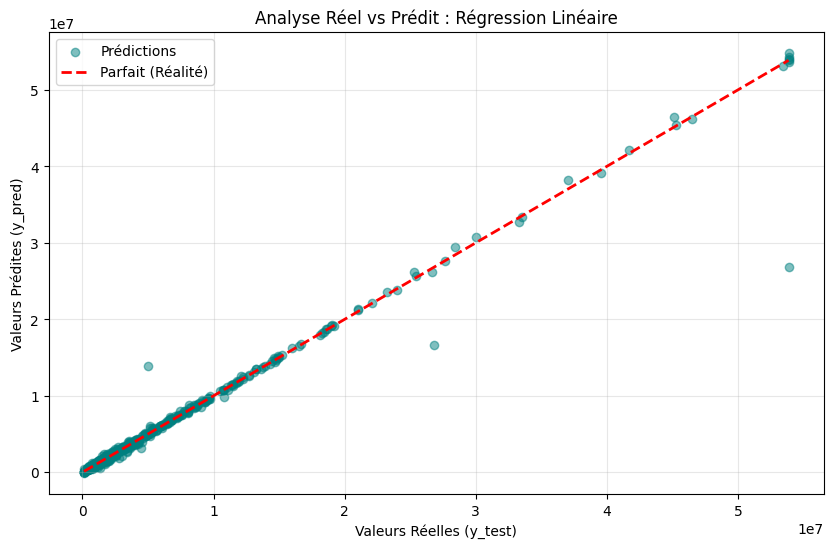

In [60]:
# ---  ---
# Pour voir "où" le modèle se trompe
print("\n6️⃣ Génération du graphique de diagnostic...")
plt.figure(figsize=(10, 6))
plt.scatter(y_test_global, y_pred_test, alpha=0.5, color='teal', label='Prédictions')
plt.plot([y_test_global.min(), y_test_global.max()], 
         [y_test_global.min(), y_test_global.max()], 
         'r--', lw=2, label='Parfait (Réalité)')

plt.title(f"Analyse Réel vs Prédit : {nom_du_modele}")
plt.xlabel("Valeurs Réelles (y_test)")
plt.ylabel("Valeurs Prédites (y_pred)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 2.3 Modelisation AUTOMATISE

### 2.3.1 TRAINING. Entrainer tous les modeles

#### Train Regresión Lineal Simple

In [61]:
# Entrenar Regresión Lineal Simple
results = modeler.entrenar_modelo(LinearRegression(), "Linear Regression")


🎯 EXPERIMENTO #14: Linear Regression

🔄 Validación Cruzada (5 folds)...
   Resultados:
   R2     → Train: 0.9983 (±0.0003) | CV: 0.9949 (±0.0043)
   MAE    → Train: 148638.5214 (±22969.0182) | CV: 175883.6793 (±10975.5441)
   RMSE   → Train: 337252.5843 (±31052.0717) | CV: 539196.5281 (±217001.5764)
   MAPE   → Train: 9.2789 (±1.9650) | CV: 10.7078 (±1.2457)

🏋️  Entrenando en 2700 samples...
   ✅ Completado en 0.03s

🔮 Predicción (Train)...
   Media: 4522903.19 | Std: 8262081.62 | Range: [-716966.82, 59762366.50]

🔮 Predicción (Test)...
   Media: 4694597.72 | Std: 7763267.74 | Range: [-110421.13, 54818229.56]

⚠️  OVERFITTING DETECTADO:
   • RMSE ratio: 3.31x

────────────────────────────────────────────────────────────
📊 RESUMEN
────────────────────────────────────────────────────────────
Métrica    |      Train |       Test |          Δ
--------------------------------------------------
R2         |     0.9981 |     0.9777 |    +0.0204
MAE        | 155492.6923 | 208499.4658 | -5300

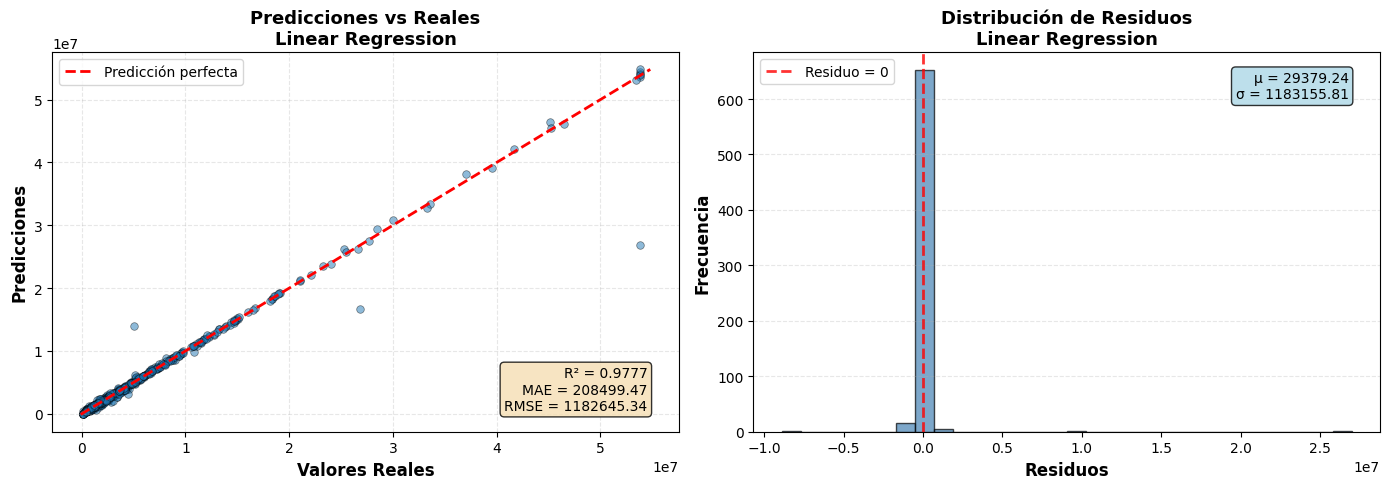

In [62]:
# Visualizar específicamente el modelo lineal
modeler.visualizar_modelo("Linear Regression")

####  Train Baseline (Mean)


🎯 EXPERIMENTO #15: Baseline (Mean)

🔄 Validación Cruzada (5 folds)...
   Resultados:
   R2     → Train: 0.0000 (±0.0000) | CV: -0.0004 (±0.0003)
   MAE    → Train: 4533930.8415 (±62741.2291) | CV: 4533425.6382 (±169911.4268)
   RMSE   → Train: 8269254.2691 (±90360.6433) | CV: 8262597.9176 (±360672.4588)
   MAPE   → Train: 302.1453 (±3.8640) | CV: 302.1671 (±14.8560)

🏋️  Entrenando en 2700 samples...
   ✅ Completado en 0.00s

🔮 Predicción (Train)...
   Media: 4522903.19 | Std: 0.00 | Range: [4522903.19, 4522903.19]

🔮 Predicción (Test)...
   Media: 4522903.19 | Std: 0.00 | Range: [4522903.19, 4522903.19]

✅ Sin overfitting significativo

────────────────────────────────────────────────────────────
📊 RESUMEN
────────────────────────────────────────────────────────────
Métrica    |      Train |       Test |          Δ
--------------------------------------------------
R2         |     0.0000 |    -0.0006 |    +0.0006
MAE        | 4533771.7453 | 4390922.9202 | +142848.8251
RMSE       | 8

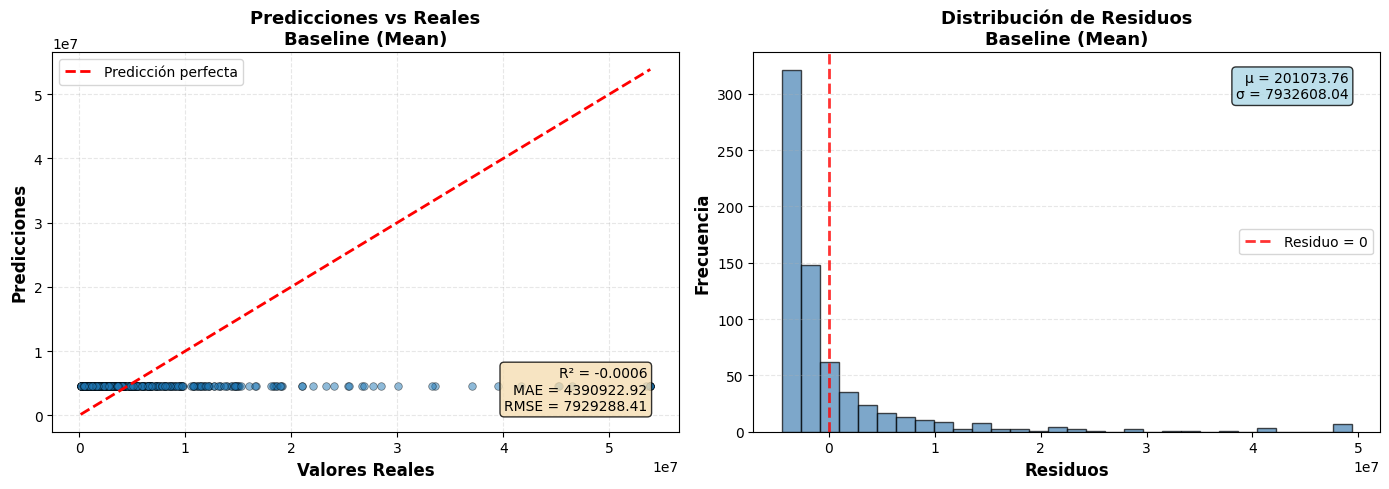

In [63]:
results = modeler.entrenar_modelo(DummyRegressor(strategy='mean'), "Baseline (Mean)")
# Visualizar específicamente el modelo lineal
modeler.visualizar_modelo("Baseline (Mean)")

####  Train SVR (RBF)


🎯 EXPERIMENTO #16: SVR (RBF)

🔄 Validación Cruzada (5 folds)...
   Resultados:
   R2     → Train: -0.1120 (±0.0023) | CV: -0.1123 (±0.0042)
   MAE    → Train: 3569284.3177 (±37172.1573) | CV: 3571156.2543 (±148452.2968)
   RMSE   → Train: 8720228.7682 (±99071.8908) | CV: 8712327.9370 (±382199.2020)
   MAPE   → Train: 100.9188 (±1.1898) | CV: 101.0907 (±5.6964)

🏋️  Entrenando en 2700 samples...
   ✅ Completado en 0.48s

🔮 Predicción (Train)...
   Media: 1751076.40 | Std: 130.58 | Range: [1750945.18, 1751376.05]

🔮 Predicción (Test)...
   Media: 1751092.73 | Std: 138.33 | Range: [1750946.66, 1751375.34]

✅ Sin overfitting significativo

────────────────────────────────────────────────────────────
📊 RESUMEN
────────────────────────────────────────────────────────────
Métrica    |      Train |       Test |          Δ
--------------------------------------------------
R2         |    -0.1123 |    -0.1406 |    +0.0283
MAE        | 3569440.1537 | 3678925.1386 | -109484.9850
RMSE       | 872

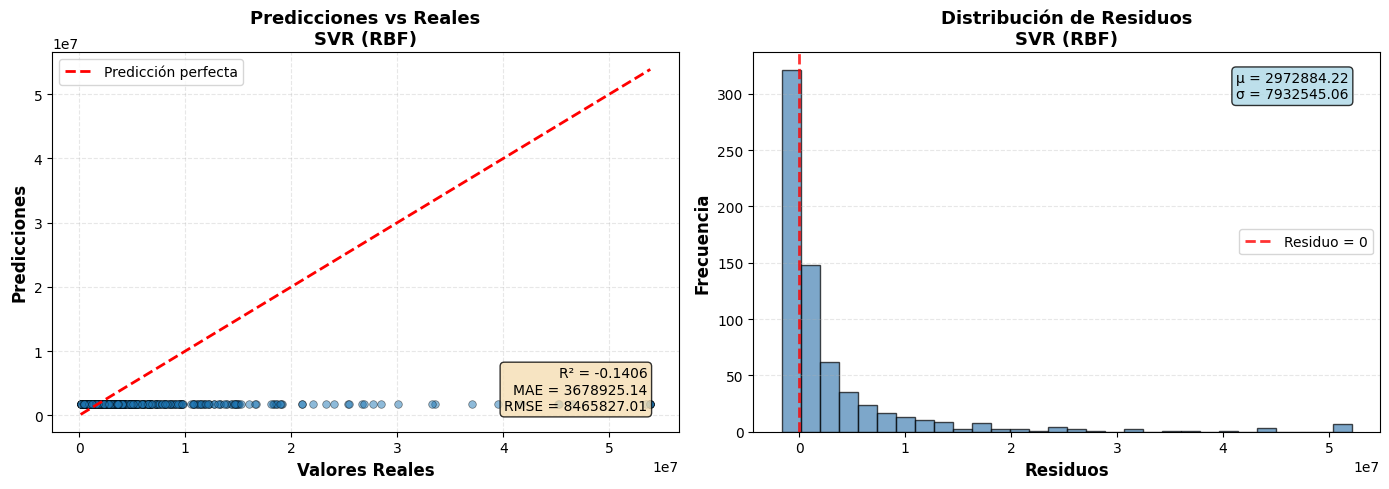

In [64]:
results = modeler.entrenar_modelo(SVR(kernel='rbf'), "SVR (RBF)")
modeler.visualizar_modelo("SVR (RBF)")

####  Train RandomForestRegressor


🎯 EXPERIMENTO #17: Random Forest

🔄 Validación Cruzada (5 folds)...
   Resultados:
   R2     → Train: 0.9998 (±0.0001) | CV: 0.9985 (±0.0025)
   MAE    → Train: 12640.0922 (±582.1667) | CV: 30118.9814 (±10024.0043)
   RMSE   → Train: 114933.1589 (±28967.4851) | CV: 231067.6956 (±209206.6819)
   MAPE   → Train: 0.1869 (±0.0034) | CV: 0.3233 (±0.0331)

🏋️  Entrenando en 2700 samples...
   ✅ Completado en 9.91s

🔮 Predicción (Train)...
   Media: 4521095.77 | Std: 8258419.93 | Range: [117200.45, 53868293.00]

🔮 Predicción (Test)...
   Media: 4714045.20 | Std: 7865939.74 | Range: [117200.45, 53868293.00]

⚠️  OVERFITTING DETECTADO:
   • MAE ratio: 2.66x
   • RMSE ratio: 2.56x

────────────────────────────────────────────────────────────
📊 RESUMEN
────────────────────────────────────────────────────────────
Métrica    |      Train |       Test |          Δ
--------------------------------------------------
R2         |     0.9998 |     0.9989 |    +0.0010
MAE        | 10933.6678 | 29054.476

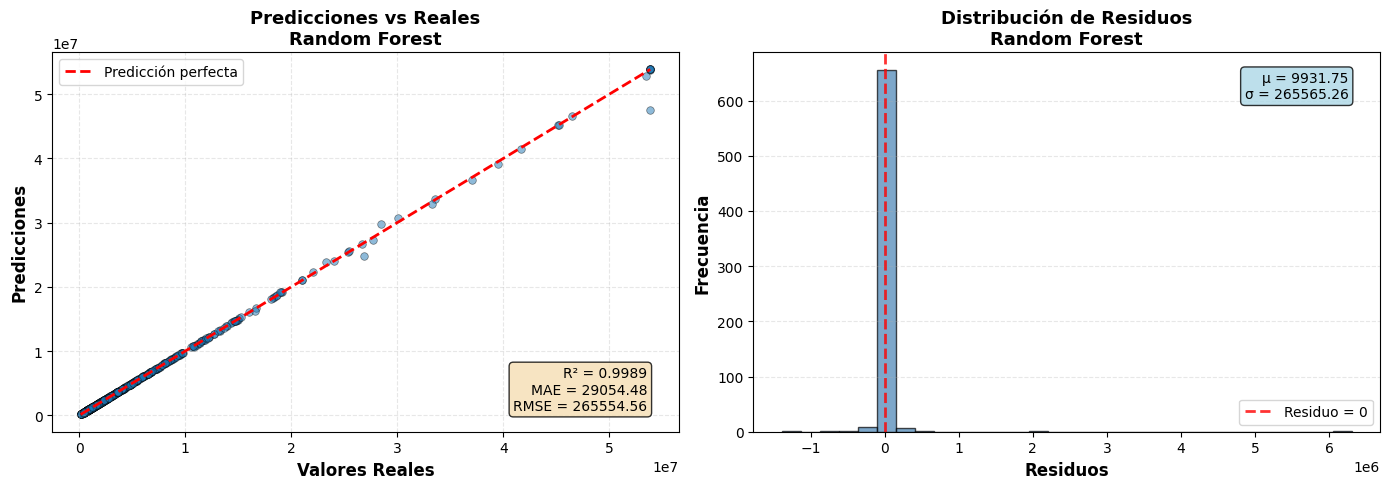

In [65]:
results = modeler.entrenar_modelo(RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42), "Random Forest")
modeler.visualizar_modelo("Random Forest")

### 3.2.2 COMPARE. Comparer tous les Modeles

In [67]:
# 7. Comparar todos los modelos en una tabla ordenada por R²
df_comparativo = modeler.comparar_modelos(sort_by='r2')


📊 COMPARACIÓN DE MODELOS (ordenado por R2)

           Modelo   R² (CV)  R² (Test)   MAE (Test)  RMSE (Test)   MAPE (%)  Tiempo (s) Overfitting  Experimento Mejor
    Random Forest  0.998520   0.998878 2.905448e+04 2.655546e+05   0.271418    9.910519          ⚠️           17     🏆
Linear Regression  0.994858   0.977740 2.084995e+05 1.182645e+06   8.768096    0.031034          ⚠️           14      
  Baseline (Mean) -0.000427  -0.000643 4.390923e+06 7.929288e+06 279.875733    0.000745           ✅           15      
        SVR (RBF) -0.112288  -0.140643 3.678925e+06 8.465827e+06  98.252668    0.476696           ✅           16      

🏆 Mejor modelo: Random Forest (R² = 0.9989)



### 3.2.3 VISUALIZE. Visualizar comparación

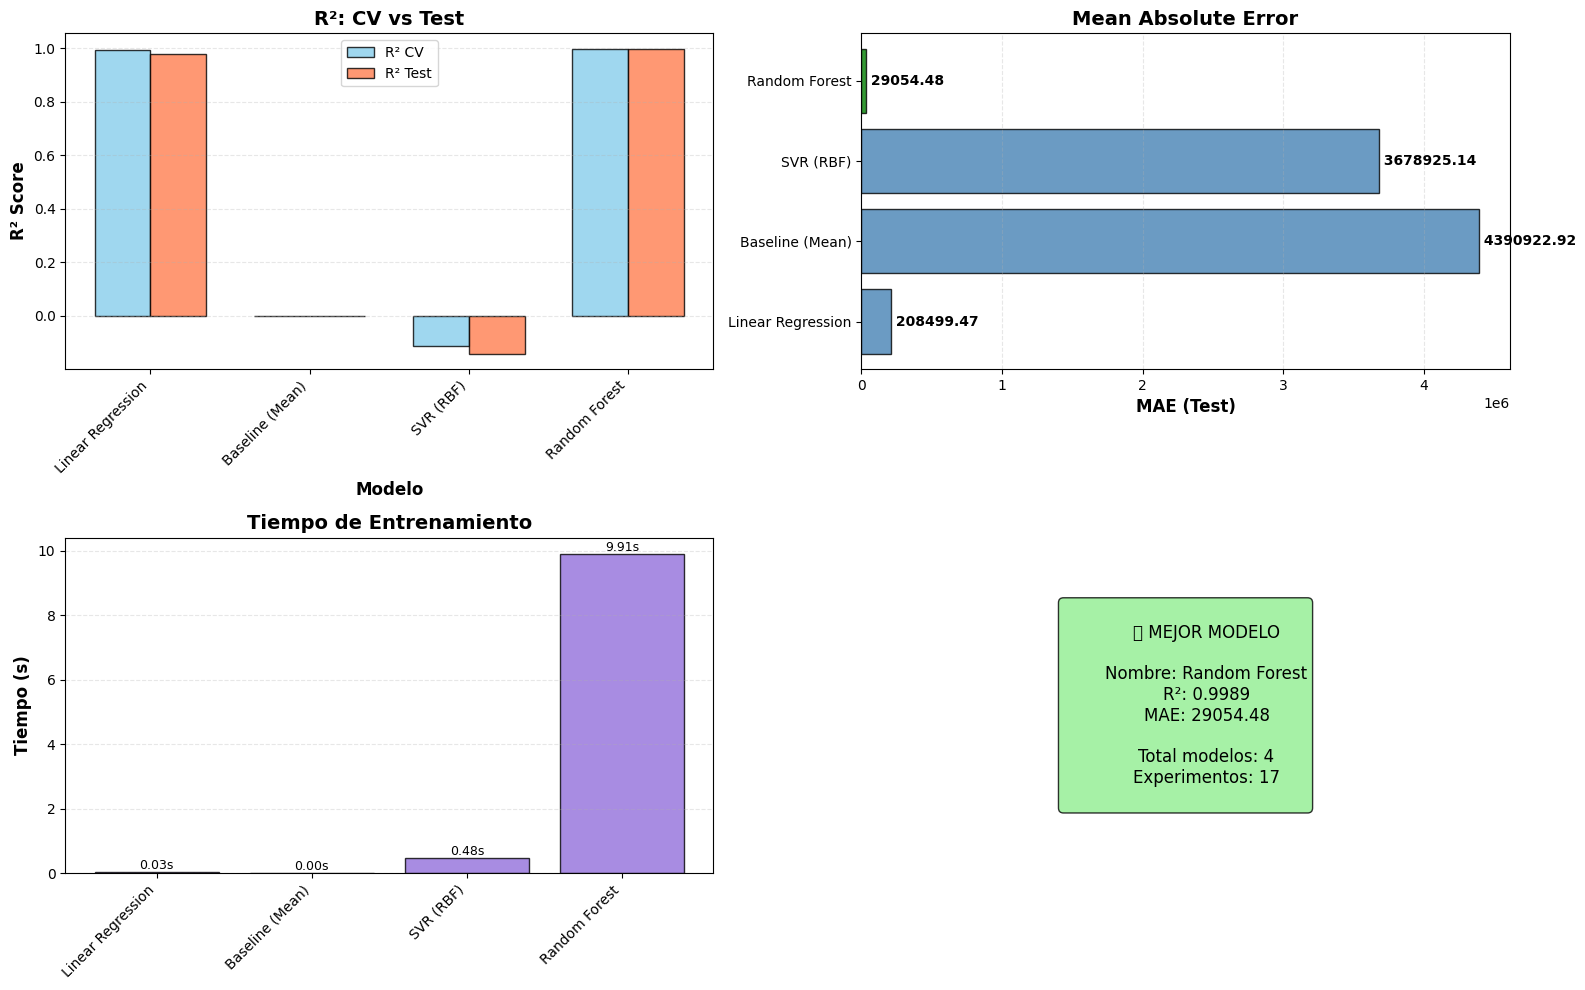

In [68]:
# 8. Visualizar comparación gráfica (R², MAE y Tiempos)
modeler.visualizar_comparacion()

### 3.2.4 ANALYSE. Analyser curve de Validation Croisée

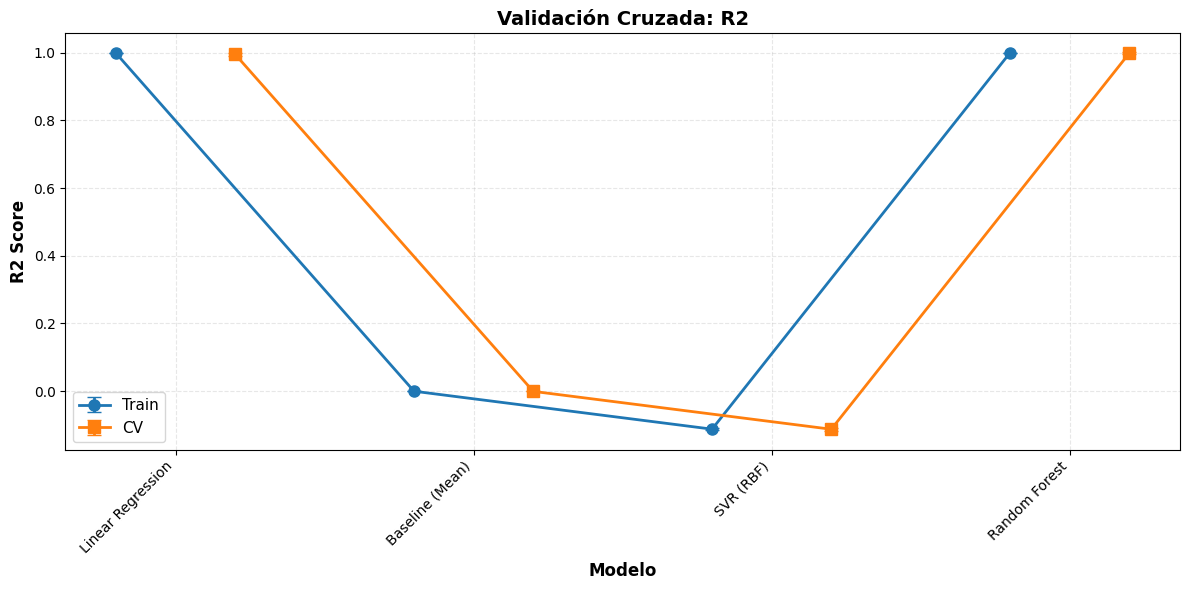

In [32]:
# 9. Analizar curvas de validación cruzada para ver estabilidad
modeler.visualizar_cv_curves(metric='r2')

### 3.2.5 INSPECT. Inspeccionar los residuos del mejor modelo

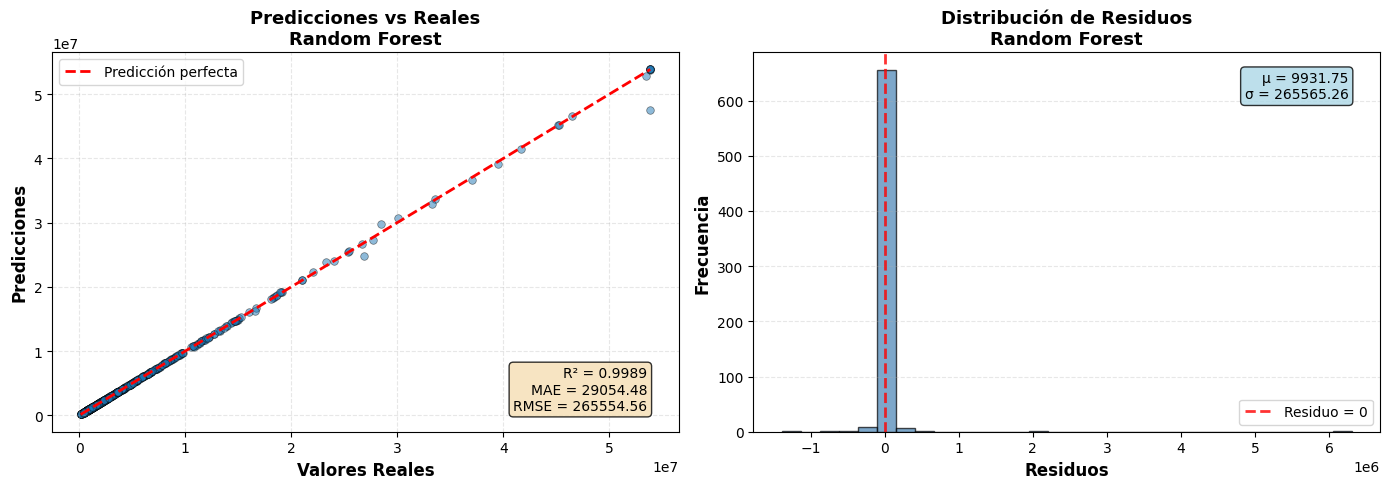

In [33]:
# 10. Inspeccionar los residuos del mejor modelo (Análisis de Errores)
modeler.visualizar_mejor_modelo()

# entrainer_et_evaluer_modele

In [13]:
# ============================================================
# CONFIGURATION GLOBALE
# ============================================================

import numpy as np
import pandas as pd
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fixer le random state pour reproductibilité
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Métriques d'évaluation
METRICS = {
    'r2': 'r2',                                    # R² (défaut sklearn)
    'mae': 'neg_mean_absolute_error',              # MAE (négatif par convention sklearn)
    'rmse': 'neg_root_mean_squared_error',         # RMSE (négatif)
    'mape': make_scorer(                           # MAPE (custom)
        lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        greater_is_better=False
    )
}

# Nombre de folds pour validation croisée
CV_FOLDS = 5

print(f"{'='*70}")
print("CONFIGURATION MODÉLISATION")
print(f"{'='*70}")
print(f"Random State     : {RANDOM_STATE}")
print(f"CV Folds         : {CV_FOLDS}")
print(f"Métriques        : {list(METRICS.keys())}")
print(f"Train samples    : {X_train_global.shape[0]}")
print(f"Test samples     : {X_test_global.shape[0]}")
print(f"Features         : {X_train_global.shape[1]}")
print(f"{'='*70}\n")

CONFIGURATION MODÉLISATION
Random State     : 42
CV Folds         : 5
Métriques        : ['r2', 'mae', 'rmse', 'mape']
Train samples    : 2700
Test samples     : 676
Features         : 74



## FONCTION PRINCIPALE D'ENTRAÎNEMENT ET ÉVALUATION

In [14]:
# ============================================================
# FONCTION PRINCIPALE D'ENTRAÎNEMENT ET ÉVALUATION
# ============================================================

def entrainer_et_evaluer_modele(
    model,
    model_name: str,
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_test: pd.DataFrame,
    y_test: pd.Series,
    cv_folds: int = 5,
    metrics: dict = None,
    verbose: bool = True
) -> dict:
    """
    Entraîne un modèle avec validation croisée et l'évalue sur test.
    
    Cette fonction réalise:
    1. Validation croisée sur le train (pour estimer la généralisation)
    2. Entraînement sur tout le train
    3. Évaluation sur le test (pour performance finale)
    
    Paramètres:
    -----------
    model : estimateur sklearn
        Modèle à entraîner (doit avoir fit() et predict())
    model_name : str
        Nom du modèle (pour affichage)
    X_train, y_train : Features et target d'entraînement
    X_test, y_test : Features et target de test
    cv_folds : int
        Nombre de folds pour la validation croisée
    metrics : dict
        Dictionnaire de métriques sklearn
    verbose : bool
        Si True, affiche les résultats détaillés
    
    Returns:
    --------
    dict : Résultats complets (scores CV, scores test, temps, etc.)
    """
    
    if metrics is None:
        metrics = METRICS
    
    if verbose:
        print(f"\n{'='*70}")
        print(f"MODÈLE : {model_name}")
        print(f"{'='*70}")
    
    # ========================================================================
    # ÉTAPE 1 : Validation Croisée sur Train
    # ========================================================================
    # Permet d'estimer la performance du modèle sur données non vues
    # et de détecter l'overfitting
    
    if verbose:
        print(f"\n1️⃣  Validation Croisée ({cv_folds} folds)...")
    
    cv_results = cross_validate(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=cv_folds,
        scoring=metrics,
        return_train_score=True,   # Pour détecter overfitting
        n_jobs=-1                  # Parallélisation
    )
    
    # Calculer moyennes et écarts-types
    cv_scores = {}
    for metric_name in metrics.keys():
        # Les scores négatifs (MAE, RMSE) doivent être inversés
        train_scores = cv_results[f'train_{metric_name}']
        test_scores = cv_results[f'test_{metric_name}']
        
        # Inverser si nécessaire (convention sklearn: négatif = minimiser)
        if metric_name in ['mae', 'rmse', 'mape']:
            train_scores = -train_scores
            test_scores = -test_scores
        
        cv_scores[metric_name] = {
            'train_mean': train_scores.mean(),
            'train_std': train_scores.std(),
            'cv_mean': test_scores.mean(),      # "test" = validation dans CV
            'cv_std': test_scores.std()
        }
    
    if verbose:
        print(f"\n   Résultats Validation Croisée:")
        for metric_name, scores in cv_scores.items():
            print(f"   {metric_name.upper():6s} - Train: {scores['train_mean']:.4f} (±{scores['train_std']:.4f}) | "
                  f"CV: {scores['cv_mean']:.4f} (±{scores['cv_std']:.4f})")
    
    # ========================================================================
    # ÉTAPE 2 : Entraînement sur TOUT le Train
    # ========================================================================
    # Maintenant qu'on a validé avec CV, on entraîne sur toutes les données
    
    if verbose:
        print(f"\n2️⃣  Entraînement sur tout le train ({X_train.shape[0]} samples)...")
    
    import time
    start_time = time.time()
    
    model.fit(X_train, y_train)
    
    train_time = time.time() - start_time
    
    if verbose:
        print(f"   ✅ Entraînement terminé en {train_time:.2f}s")
    
    # ========================================================================
    # ÉTAPE 3 : Évaluation sur Test (Performance Finale)
    # ========================================================================
    # Le test set n'a JAMAIS été vu par le modèle → performance réelle
    
    if verbose:
        print(f"\n3️⃣  Évaluation sur Test ({X_test.shape[0]} samples)...")
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculer métriques finales
    test_scores = {
        'r2': r2_score(y_test, y_test_pred),
        'mae': mean_absolute_error(y_test, y_test_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'mape': np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    }
    
    train_scores_final = {
        'r2': r2_score(y_train, y_train_pred),
        'mae': mean_absolute_error(y_train, y_train_pred),
        'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'mape': np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    }
    
    if verbose:
        print(f"\n   Scores Finaux:")
        print(f"   {'Métrique':10s} | {'Train':>10s} | {'Test':>10s} | {'Écart':>10s}")
        print(f"   {'-'*50}")
        
        for metric in ['r2', 'mae', 'rmse', 'mape']:
            train_val = train_scores_final[metric]
            test_val = test_scores[metric]
            diff = train_val - test_val
            
            print(f"   {metric.upper():10s} | {train_val:10.4f} | {test_val:10.4f} | {diff:10.4f}")
    
    # ========================================================================
    # DÉTECTION D'OVERFITTING
    # ========================================================================
    # Si performance train >> test → overfitting
    
    overfitting_detected = False
    
    # Critère 1: R² train très supérieur à R² test
    r2_gap = train_scores_final['r2'] - test_scores['r2']
    if r2_gap > 0.1:  # Plus de 10 points d'écart
        overfitting_detected = True
        if verbose:
            print(f"\n   ⚠️  Overfitting détecté: R² gap = {r2_gap:.3f}")
    
    # Critère 2: MAE test >> MAE train
    mae_ratio = test_scores['mae'] / train_scores_final['mae']
    if mae_ratio > 1.5:  # Test 50% pire que train
        overfitting_detected = True
        if verbose:
            print(f"   ⚠️  Overfitting détecté: MAE ratio = {mae_ratio:.2f}")
    
    if not overfitting_detected and verbose:
        print(f"\n   ✅ Pas d'overfitting détecté")
    
    # ========================================================================
    # RETOUR DES RÉSULTATS
    # ========================================================================
    
    results = {
        'model_name': model_name,
        'model': model,
        'cv_scores': cv_scores,
        'train_scores': train_scores_final,
        'test_scores': test_scores,
        'train_time': train_time,
        'overfitting': overfitting_detected,
        'predictions': {
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred
        }
    }
    
    if verbose:
        print(f"{'='*70}\n")
    
    return results

## Entraînement des Modèles

In [15]:
# ============================================================
# ENTRAINEMENT DE TOUS LES MODÈLES
# ============================================================

# Dictionnaire des modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Baseline (Dummy)': DummyRegressor(strategy='mean'),
    'SVM (RBF)': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
}

# Stocker les résultats
results_all = {}

# Entraîner chaque modèle
for model_name, model in models.items():
    results = entrainer_et_evaluer_modele(
        model=model,
        model_name=model_name,
        X_train=X_train_global,
        y_train=y_train_global,
        X_test=X_test_global,
        y_test=y_test_global,
        cv_folds=CV_FOLDS,
        verbose=True
    )
    
    results_all[model_name] = results

print(f"✅ {len(models)} modèles entraînés et évalués")


MODÈLE : Linear Regression

1️⃣  Validation Croisée (5 folds)...

   Résultats Validation Croisée:
   R2     - Train: 0.9983 (±0.0003) | CV: 0.9949 (±0.0043)
   MAE    - Train: 148638.5214 (±22969.0182) | CV: 175883.6793 (±10975.5441)
   RMSE   - Train: 337252.5843 (±31052.0717) | CV: 539196.5281 (±217001.5764)
   MAPE   - Train: 9.2789 (±1.9650) | CV: 10.7078 (±1.2457)

2️⃣  Entraînement sur tout le train (2700 samples)...
   ✅ Entraînement terminé en 0.05s

3️⃣  Évaluation sur Test (676 samples)...

   Scores Finaux:
   Métrique   |      Train |       Test |      Écart
   --------------------------------------------------
   R2         |     0.9981 |     0.9777 |     0.0204
   MAE        | 155492.6923 | 208499.4658 | -53006.7735
   RMSE       | 357667.7809 | 1182645.3428 | -824977.5619
   MAPE       |     9.5063 |     8.7681 |     0.7383

   ✅ Pas d'overfitting détecté


MODÈLE : Baseline (Dummy)

1️⃣  Validation Croisée (5 folds)...

   Résultats Validation Croisée:
   R2     - Tra

# Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [16]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE

## 📊 Comparaison des Modèles

In [17]:
# ============================================================
# TABLEAU COMPARATIF
# ============================================================

def generer_tableau_comparatif(results_all: dict) -> pd.DataFrame:
    """
    Génère un tableau comparatif de tous les modèles.
    """
    
    rows = []
    
    for model_name, results in results_all.items():
        row = {
            'Modèle': model_name,
            'R² (CV)': results['cv_scores']['r2']['cv_mean'],
            'R² (Test)': results['test_scores']['r2'],
            'MAE (CV)': results['cv_scores']['mae']['cv_mean'],
            'MAE (Test)': results['test_scores']['mae'],
            'RMSE (Test)': results['test_scores']['rmse'],
            'MAPE (Test)': results['test_scores']['mape'],
            'Temps (s)': results['train_time'],
            'Overfitting': '⚠️' if results['overfitting'] else '✅'
        }
        rows.append(row)
    
    df = pd.DataFrame(rows)
    
    # Trier par R² Test (décroissant)
    df = df.sort_values('R² (Test)', ascending=False).reset_index(drop=True)
    
    return df

# Générer tableau
df_comparaison = generer_tableau_comparatif(results_all)

print(f"\n{'='*70}")
print("TABLEAU COMPARATIF DES MODÈLES")
print(f"{'='*70}\n")
print(df_comparaison.to_string(index=False))
print(f"\n{'='*70}\n")

# Identifier le meilleur modèle
best_model_name = df_comparaison.iloc[0]['Modèle']
best_r2 = df_comparaison.iloc[0]['R² (Test)']

print(f"🏆 Meilleur modèle: {best_model_name} (R² = {best_r2:.4f})")



TABLEAU COMPARATIF DES MODÈLES

           Modèle   R² (CV)  R² (Test)     MAE (CV)   MAE (Test)  RMSE (Test)  MAPE (Test)  Temps (s) Overfitting
    Random Forest  0.998495   0.999158 2.933252e+04 2.671798e+04 2.299495e+05     0.230028   3.603627          ⚠️
Linear Regression  0.994858   0.977740 1.758837e+05 2.084995e+05 1.182645e+06     8.768096   0.052338           ✅
 Baseline (Dummy) -0.000427  -0.000643 4.533426e+06 4.390923e+06 7.929288e+06   279.875733   0.000770           ✅
        SVM (RBF) -0.112288  -0.140643 3.571156e+06 3.678925e+06 8.465827e+06    98.252668   0.468720           ✅


🏆 Meilleur modèle: Random Forest (R² = 0.9992)
